In [2]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

#diplay preferences
%matplotlib inline
pd.options.display.float_format = '{: .3f}'.format

#suppress harmless error
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
data = pd.read_excel('C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/U2/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls',
                     skiprows = 4)

In [4]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000


#### Rename columns

In [5]:
data.rename(columns = {data.columns[0]: 'city',
                       data.columns[1]: 'pop',
                       data.columns[2]: 'violent_crime',
                       data.columns[3]: 'murder',
                       data.columns[4]: 'rape_revised',
                       data.columns[5]: 'rape_legacy',
                       data.columns[6]: 'robbery',
                       data.columns[7]: 'assult',
                       data.columns[8]: 'property_crime',
                       data.columns[9]: 'burglary',
                       data.columns[10]: 'theft',
                       data.columns[11]: 'car_theft',
                       data.columns[12]: 'arson'}, inplace = True)

#### Design features the same way as in the previous challenge 

In [6]:
#robbery - change to categorical (everything greater than 0 = 1)
data['robbery_cat'] = data['robbery'].apply(lambda x: 1 if x > 0 else 0)

#https://cmdlinetips.com/2019/05/how-to-create-a-column-using-condition-on-another-column-in-pandas/

In [7]:
data['murder_cat'] = data.iloc[:,3].apply(lambda x: 1 if x > 0 else 0)
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [8]:
data['pop_squared'] = np.square(data['pop'])

In [9]:
#combine murder and violent crimes into one category 'violence'
data['violence'] = data['violent_crime'] + data['murder']

In [10]:
#calculate the per capita rate of extreme violence
data['violence_rate'] = data['violence'] / data['pop']

In [11]:
data.head()

,city,pop,violent_crime,murder,rape_revised,rape_legacy,robbery,assult,property_crime,burglary,theft,car_theft,arson,robbery_cat,murder_cat,pop_squared,violence,violence_rate
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,0,0,3426201.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,1,0,6594624.000,2.000,0.001
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0,0,672400.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,0,0,8076964.000,1.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,1,1,9720974025.000,810.000,0.008


In [12]:
data_subset = data[['violence_rate', 'pop_squared', 'robbery_cat', 'murder_cat', 'property_crime']]

In [14]:
data_subset = data_subset.dropna()

#### Design the model just like before

In [29]:
#regr = linear_model.LinearRegression()
Y = data_subset['property_crime']
X = data_subset[['pop_squared', 'violence_rate', 'robbery_cat', 'murder_cat']]
#regr.fit(X, Y)

In [23]:
#regr.score(X, Y)

0.9893435182613208

#### Test the model with different hold out groups

In [35]:
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_train, y_train)))
print('Testing on Sample: ' + str(regr.score(X_test, y_test)))
#score is the R2 values

With 20% Holdout: 0.9908003973417221
Testing on Sample: -3.1474801363798566


In [34]:
#try crossvalidation
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)
#breaks up the data (both X and Y) into 10 parts. First 9 parts are the training set
#and last one is the test set. Then it moves on to the next iteration (takes out another)
#single part and refits.

array([ 6.78743688e-01,  3.25008954e-01, -6.42702486e-01,  4.80549998e-02,
       -7.30357920e-01, -1.26239654e+01, -6.26854900e+03,  3.67556341e-01,
        6.62545484e-01,  6.50418590e-01])

In [36]:
#the cross validation scores should be close to each other - otherwise that means data might 
#be being overfit. 

So there is an issue of overfitting with this model - the R2 score is negative and the cross validation scores are not close enough to each other. I will try adding some additional features to try and improve the model.

In [37]:
data['burglary_robbery'] = data['robbery'] + data['burglary']

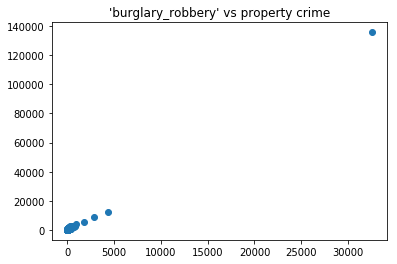

In [41]:
plt.scatter(data['burglary_robbery'], data['property_crime'])
plt.title("'burglary_robbery' vs property crime")
plt.show()

In [43]:
data_subset2 = data[['burglary_robbery', 'violence_rate', 'pop_squared', 
                     'property_crime']].dropna()

In [44]:
X_new = data_subset2[['burglary_robbery', 'violence_rate', 'pop_squared']]
Y_new = data_subset['property_crime']

In [45]:
linreg = linear_model.LinearRegression()
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, 
                                                    test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_train, y_train)))
print('Testing on Sample: ' + str(regr.score(X_test, y_test)))
#score is the R2 values

With 20% Holdout: 0.9990039830799547
Testing on Sample: 0.8445448747292943


In [46]:
#try crossvalidation
cross_val_score(regr, X_new, Y_new, cv=10)

array([  0.82872174,   0.94362715,   0.77953285,   0.61429801,
         0.8119629 ,   0.50660623, -22.37480416,   0.98017086,
         0.98889696,   0.83452428])

This is much better - the test and training data sets, using the hold out method, result in R2 values that are close. Also, cross validation values (R2 for each iteration) are much closer together.

This model is a much better predictor than the previous one!